In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import pairwise_distances
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

In [81]:
data=pd.read_csv("Analysis.csv")
data.head(5)

,Unnamed: 0,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [82]:
data=data.drop(["Unnamed: 0"],axis=1)

In [83]:
data.head(5)

,Genotypes,PruningBiomass,TimeofBudbrust,Timeoffullbloom,Time of verasion,ABW,BW,BD,BL,TSS,Acidity,Compaactness,Skinfirmness,Bunlen,pedunclelength,Physiologicalmaturity,Seed weight,NOS
0,(Gulabi X B’lore Purple),0.327667,9.000000,38.333333,105.000000,558.676667,104.800000,16.900000,18.233333,18.533333,0.566667,5.550000,60.966667,10.433333,32.933333,127.000000,4.203333,2.000000
1,Alden,2.137667,10.000000,35.333333,102.666667,262.866667,182.776667,15.523333,17.666667,18.656667,0.716667,8.446667,40.700000,14.156667,25.233333,116.666667,11.836667,2.000000
2,Aledo,0.912667,10.666667,39.666667,109.000000,124.340000,176.866667,21.333333,23.666667,18.090000,0.666667,5.560000,51.200000,15.776667,22.066667,141.666667,5.390000,2.333333
3,Amber Sweet,0.528667,10.000000,36.333333,99.333333,85.626667,137.363333,15.166667,17.600000,18.010000,0.553333,3.820000,38.233333,9.266667,10.953333,121.333333,4.030000,1.333333
4,Arka Chitra,1.075667,10.000000,35.000000,102.666667,317.273333,237.713333,18.766667,21.266667,16.943333,0.746667,2.793333,52.643333,17.633333,26.366667,127.333333,3.460000,1.666667


In [84]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Genotypes              75 non-null     object 
 1   PruningBiomass         75 non-null     float64
 2   TimeofBudbrust         75 non-null     float64
 3   Timeoffullbloom        75 non-null     float64
 4   Time of verasion       75 non-null     float64
 5   ABW                    75 non-null     float64
 6   BW                     75 non-null     float64
 7   BD                     75 non-null     float64
 8   BL                     75 non-null     float64
 9   TSS                    75 non-null     float64
 10  Acidity                75 non-null     float64
 11  Compaactness           75 non-null     float64
 12  Skinfirmness           75 non-null     float64
 13  Bunlen                 75 non-null     float64
 14  pedunclelength         75 non-null     float64
 15  Physiolo

In [85]:
data.isnull().sum()

Genotypes                0
PruningBiomass           0
TimeofBudbrust           0
Timeoffullbloom          0
Time of verasion         0
ABW                      0
BW                       0
BD                       0
BL                       0
TSS                      0
Acidity                  0
Compaactness             0
Skinfirmness             0
Bunlen                   0
pedunclelength           0
Physiologicalmaturity    0
Seed weight              0
NOS                      0
dtype: int64

In [86]:
data1=data.select_dtypes(include=[float,int])

In [87]:
ss=StandardScaler()

In [88]:
data_scaled=ss.fit_transform(data1)

In [89]:
inertia=[]

In [90]:
for k in range (1 , 11):
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

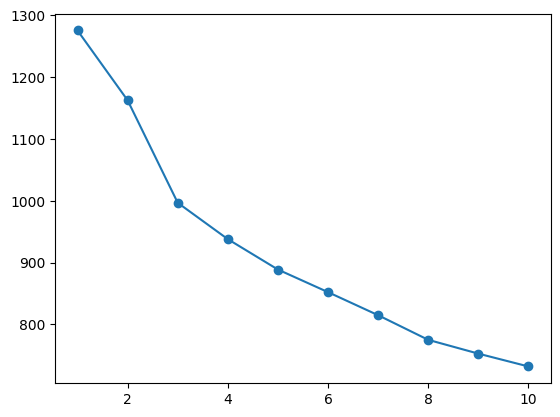

In [91]:
plt.plot(range(1,11),inertia,marker="o")
plt.show()

Mean distance from points to their cluster centers:
Cluster
0    3.338060
1    3.524413
2    3.759835
Name: Distance_to_center, dtype: float64
Overall mean distance: 3.5854940330650735


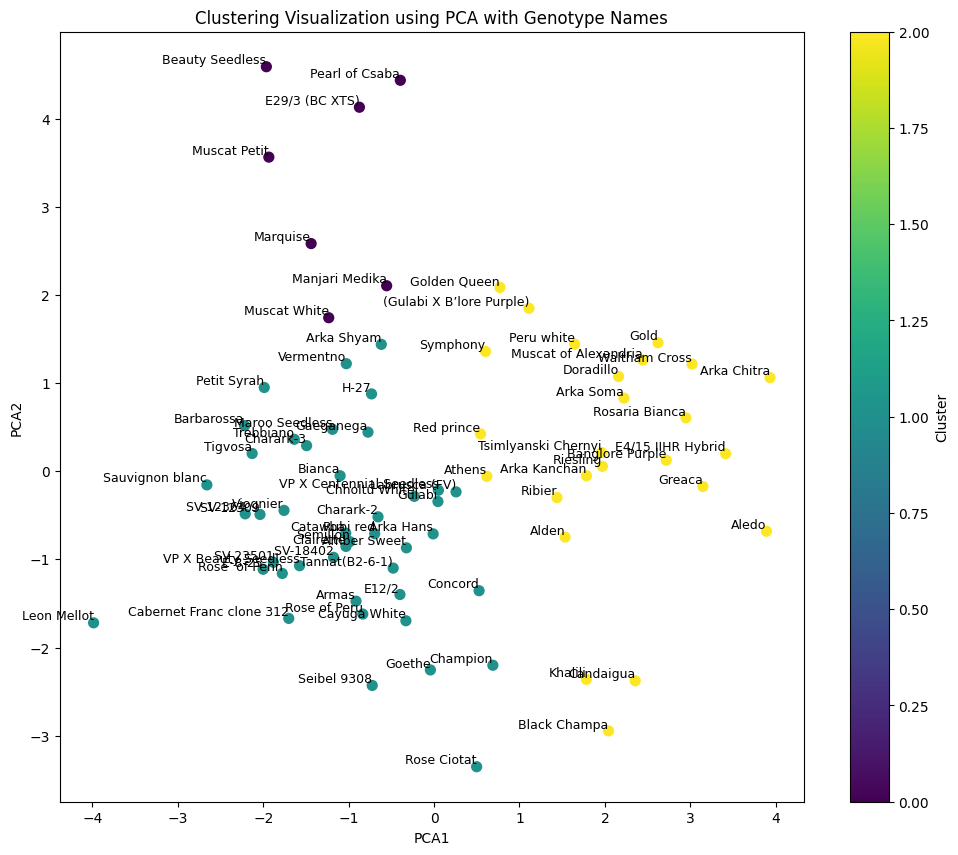

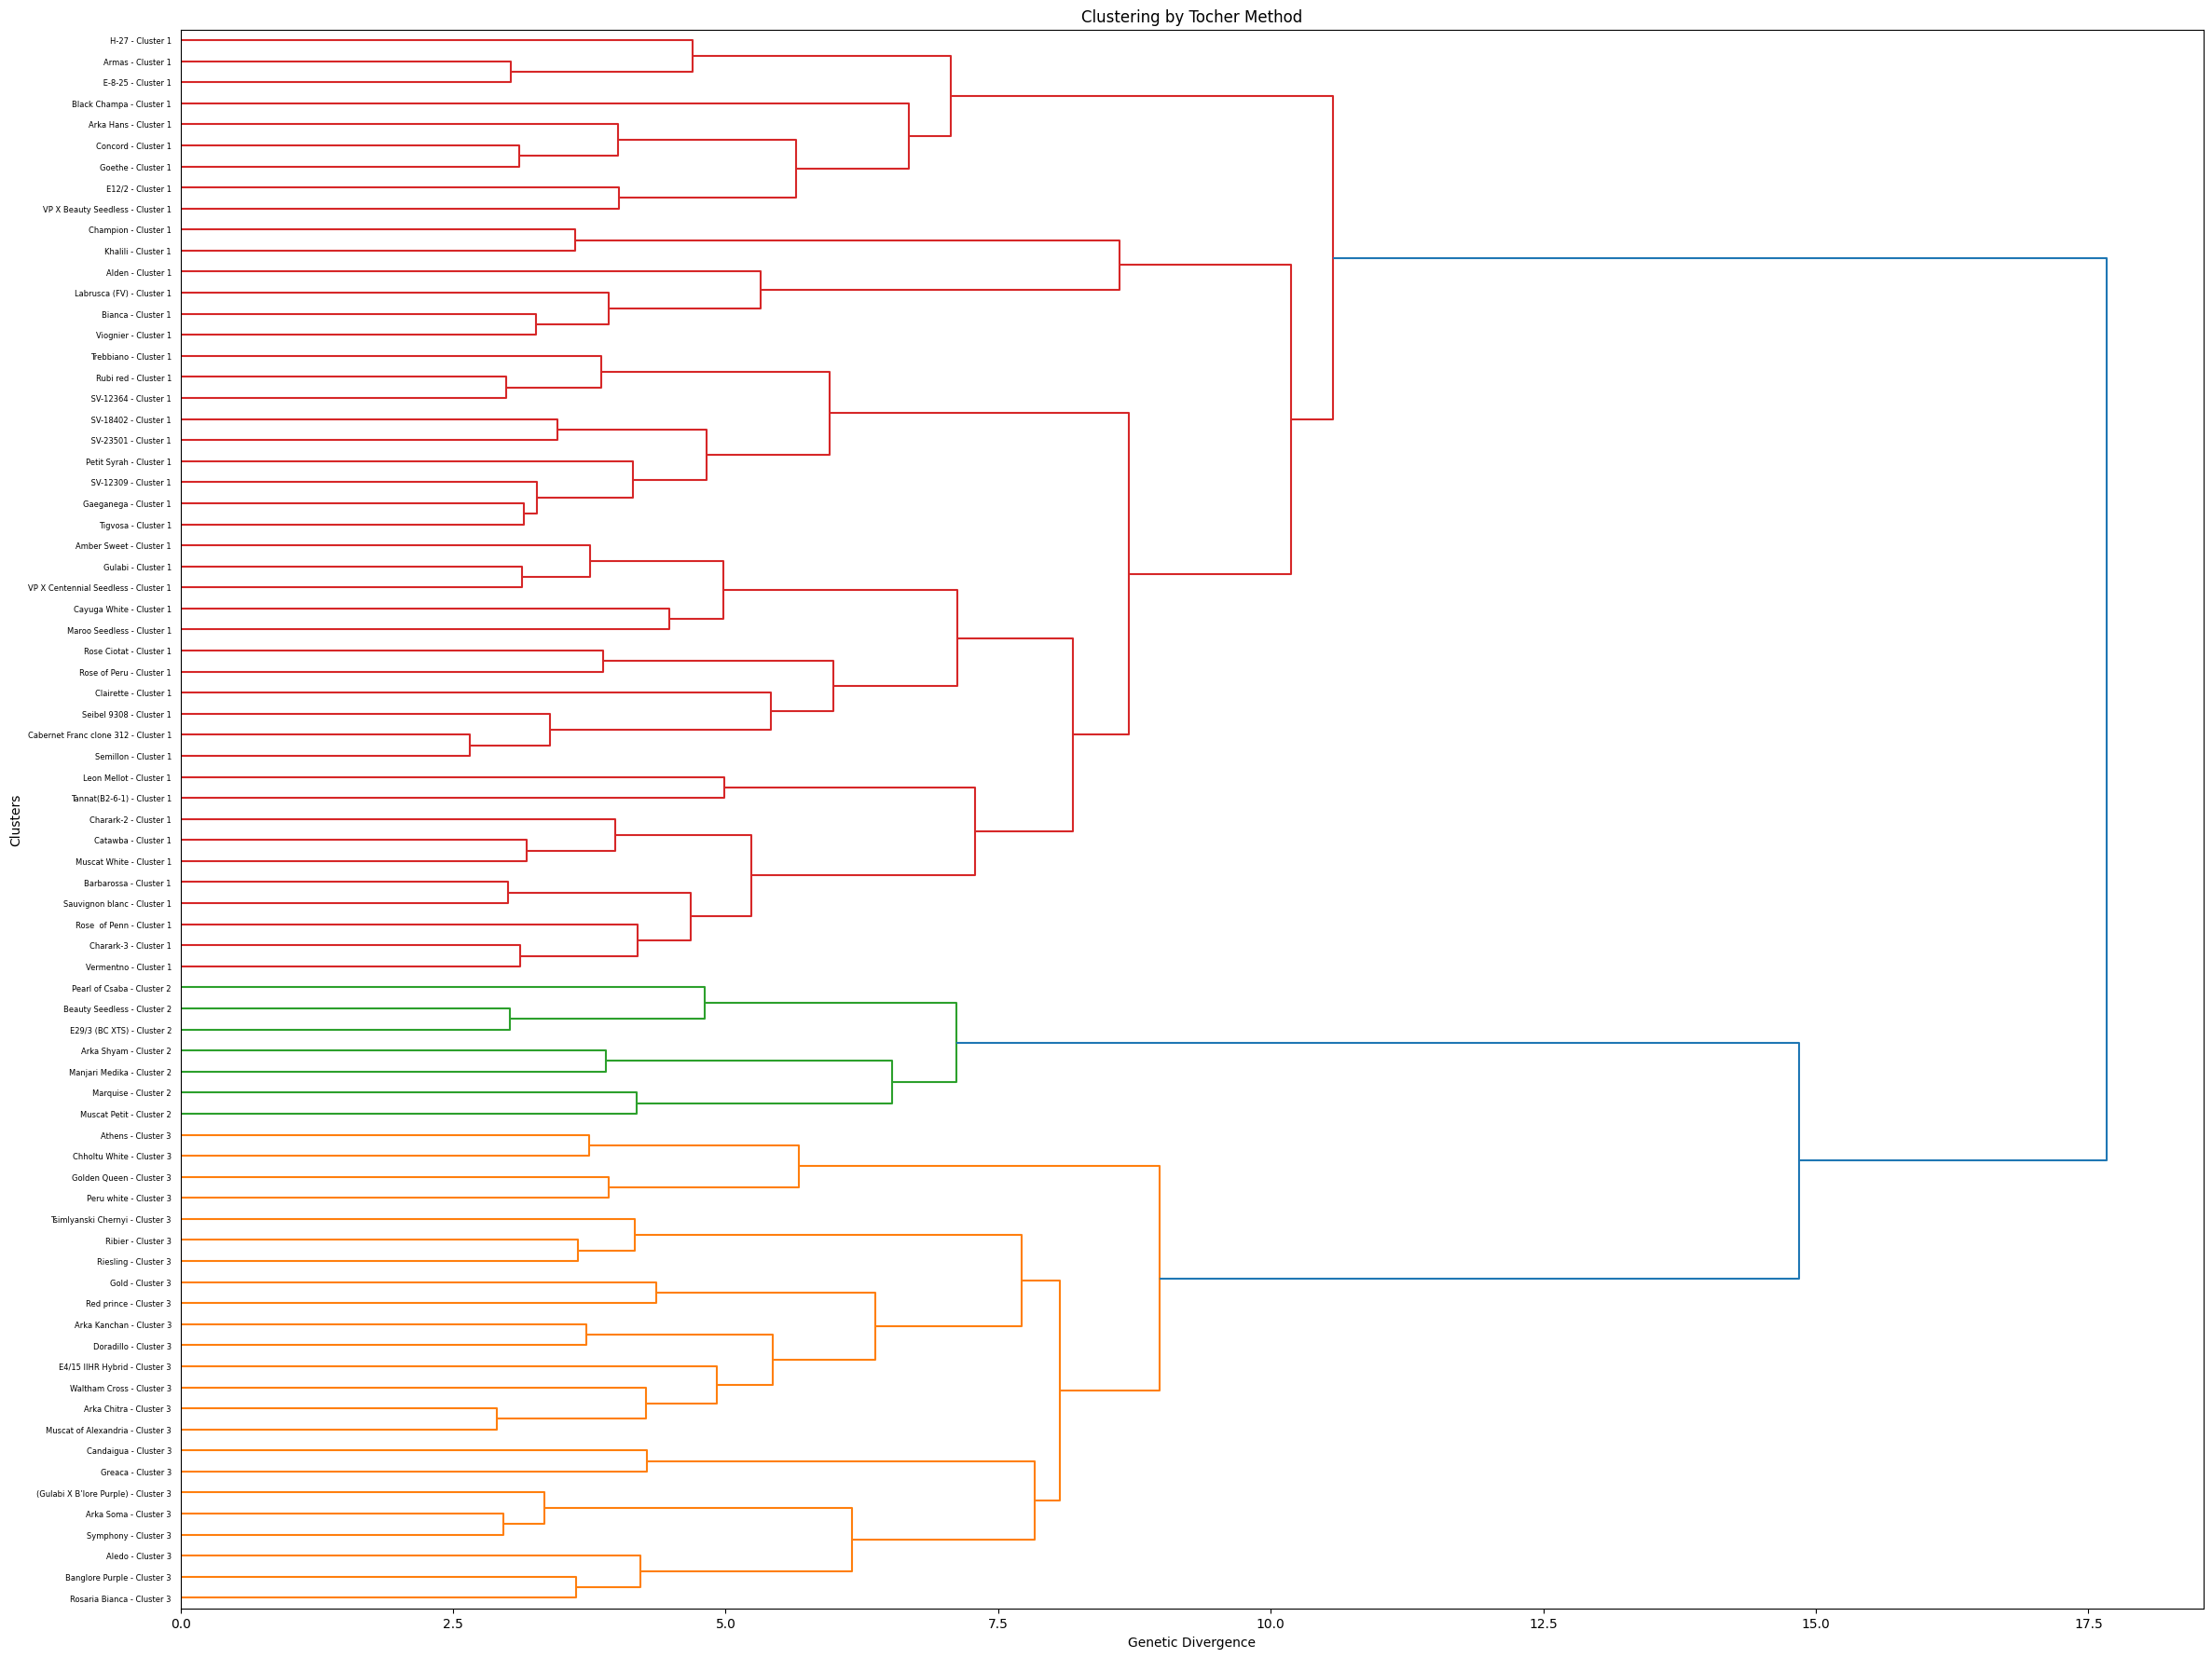

In [95]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_scaled)
data1['Cluster'] = kmeans.labels_

distances = pairwise_distances(data_scaled, kmeans.cluster_centers_)
data1['Distance_to_center'] = distances[np.arange(len(distances)), data1['Cluster']]

mean_distances = data1.groupby('Cluster')['Distance_to_center'].mean()

print("Mean distance from points to their cluster centers:")
print(mean_distances)

overall_mean_distance = data1['Distance_to_center'].mean()
print(f"Overall mean distance: {overall_mean_distance}")

pca = PCA(n_components=2)
pca_components = pca.fit_transform(data_scaled)

data_pca = pd.DataFrame(pca_components, columns=['PCA1', 'PCA2'])

data_pca['Cluster'] = data1['Cluster']
data_pca['Genotypes'] = data['Genotypes'] 

plt.figure(figsize=(12, 10))  
plt.scatter(data_pca['PCA1'], data_pca['PCA2'], c=data_pca['Cluster'], cmap='viridis', marker='o', s=50)

annotated_genotypes = set()

for i, genotype in enumerate(data_pca['Genotypes']):
    if genotype not in annotated_genotypes: 
        plt.text(data_pca['PCA1'].iloc[i], data_pca['PCA2'].iloc[i], genotype,
                 fontsize=9, ha='right', va='bottom', color='black')
        annotated_genotypes.add(genotype)  

plt.colorbar(label='Cluster')
plt.title('Clustering Visualization using PCA with Genotype Names')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

cluster_labels = fcluster(linked, 3, criterion='maxclust')

data1['Cluster'] = cluster_labels

data_reset = data.reset_index(drop=True)
data1_reset = data1.reset_index(drop=True)

genotype_to_cluster = {i: data_reset['Genotypes'].iloc[i] for i in range(len(data1_reset))}

custom_labels = [f"{genotype_to_cluster[i]} - Cluster {cluster_labels[i]}" for i in range(len(data1_reset))]

plt.figure(figsize=(28, 22))
dendrogram(linked, orientation='right', labels=custom_labels, distance_sort='descending')
plt.title('Clustering by Tocher Method')
plt.xlabel('Genetic Divergence')
plt.ylabel('Clusters')
plt.show()
